In [50]:
import pandas as pd
import os

In [51]:
#경로설정 읽어오는 경로, 저장하는 경로
Path = os.path.join('Users','woosung','Gwang','Big_Data_Project','data')
Path2 = 'D:/Big_Data_Project/data'
Path3 = 'C:/Users/shjo/Desktop/gwangjin_data/전처리/Gwangjin_project\data'

In [52]:
df=pd.read_csv(f'{Path3}/preprocessed_data.csv')

In [53]:
#인구데이터를 면적으로 
df.drop(labels=["정원수","성비"],axis=1,inplace=True)

In [54]:
df.columns

Index(['행정동', '사고건수', '신호등수', '무인교통단속카메라수량', 'CCTV수량', '범죄율평균', '어린이보호구역', '계',
       '인구수(남)', '인구수(여)', '지역(구성비)', '구성비(남)', '구성비(여)', '세대수', '세대당인구',
       '대중교통승객수', '공영주차장수', '공영주차장주차면수', '인구밀도 (명/㎢)', '총생활인구수', '도로'],
      dtype='object')

In [55]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc 

In [56]:
rc('font', family='AppleGothic') ## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [57]:
df = df.set_index("행정동")

In [58]:
import numpy as np

***

# 누적 설명 분산 비율

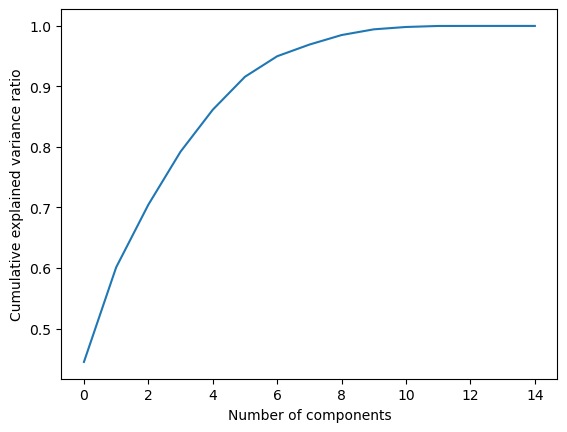

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 객체를 생성합니다.
pca = PCA()

# 주성분을 추출하기 전, 데이터를 StandardScaler를 사용하여 정규화합니다.
X_scaled = StandardScaler().fit_transform(df)

# 주성분 분석을 수행합니다.
pca.fit(X_scaled)

# 각 주성분이 설명하는 분산의 비율을 계산합니다.
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명 분산을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

***

# 주성분 분석, 주성분 변환

Transformed data shape: (15, 4)
Transformed data:
 [[ 5.7102258  -0.45555568 -0.29440685 -2.31742441]
 [-0.38242081  0.40661199 -1.89935711  1.01984563]
 [ 1.64629199 -0.79593029 -0.16007437  0.61910421]
 [ 3.57426801  0.71014897  2.20874114 -1.05361191]
 [-0.8299472   1.19199335  0.47924218 -0.36709492]]
Explained variance ratio: [0.44478351 0.15629806 0.10355078 0.08767081]


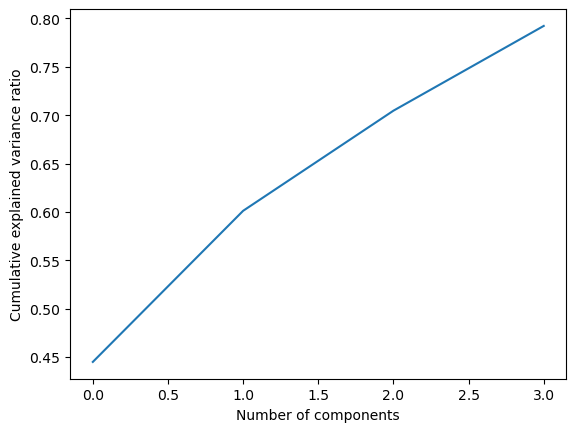

In [60]:
import matplotlib.pyplot as plt

# PCA 객체를 생성합니다.
pca = PCA(n_components=4)

# 주성분을 추출하기 전, 데이터를 StandardScaler를 사용하여 정규화합니다.
X_scaled = StandardScaler().fit_transform(df)

# 주성분 분석을 수행합니다.
pca.fit(X_scaled)

# 주성분 변환을 수행합니다.
X_pca = pca.transform(X_scaled)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', X_pca.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', X_pca[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

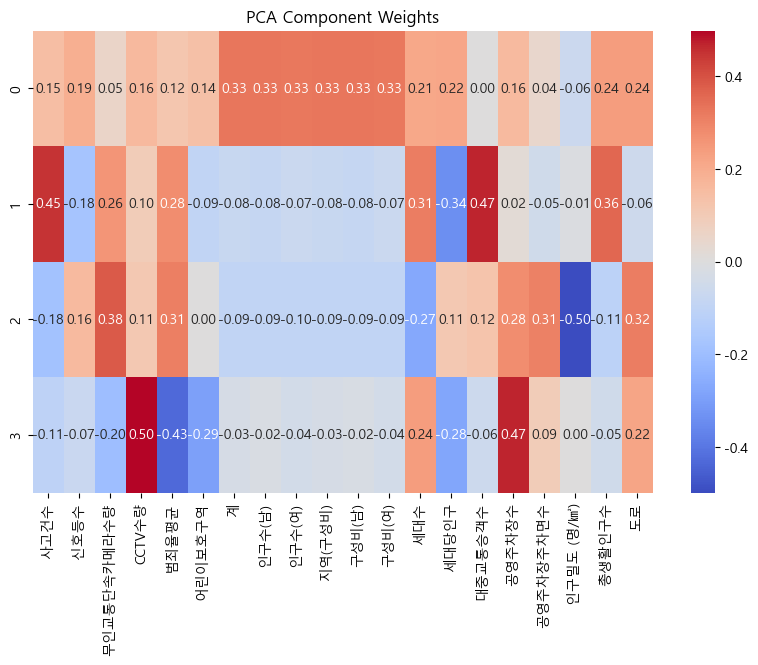

In [61]:
plt.rc('font', family='Malgun Gothic')

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()

In [62]:
print(pca.components_)

[[ 0.14609532  0.19470839  0.05494995  0.16228749  0.12048697  0.13830029
   0.32735837  0.32776704  0.3257351   0.32740079  0.32772053  0.32574958
   0.21165774  0.21524664  0.00112573  0.15955977  0.04378895 -0.06455504
   0.23899367  0.23779736]
 [ 0.44884448 -0.17853138  0.25706645  0.09518527  0.2785924  -0.09435589
  -0.0757906  -0.08436626 -0.06756121 -0.07564226 -0.08435073 -0.0679733
   0.31393157 -0.34183377  0.46793156  0.01971408 -0.04705404 -0.01073758
   0.36049187 -0.05554941]
 [-0.1848876   0.15735469  0.38172541  0.11233578  0.30840132  0.00233851
  -0.09481532 -0.09386962 -0.0953305  -0.09483524 -0.09455611 -0.09462969
  -0.27047658  0.11260054  0.12471008  0.27912811  0.30713044 -0.49836214
  -0.11213514  0.31505096]
 [-0.10588577 -0.073574   -0.19922441  0.49846508 -0.4307999  -0.292769
  -0.02980314 -0.01851247 -0.04014514 -0.02991372 -0.01983635 -0.04051471
   0.24072418 -0.27780445 -0.06162612  0.46937548  0.09416183  0.0027614
  -0.04720121  0.21864611]]


In [63]:
pc1 : 인구수(남)(+),구성비(남)(+) -> 인구 관련 요인
pc2 : 대중교통승객수(+), 사고건수(+), 총생활인구수 -> 교통/사고 관련 요인
pc3 : 무인교통단속카메라, 인구밀도 -> 교통 관련 요인
pc4 : cctv수량, 공영주차장수 -> 안전/교통 관련 요인

SyntaxError: invalid syntax (486911347.py, line 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 광장동 to 화양동
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고건수         15 non-null     int64  
 1   신호등수         15 non-null     float64
 2   무인교통단속카메라수량  15 non-null     int64  
 3   CCTV수량       15 non-null     int64  
 4   범죄율평균        15 non-null     float64
 5   어린이보호구역      15 non-null     float64
 6   계            15 non-null     int64  
 7   인구수(남)       15 non-null     int64  
 8   인구수(여)       15 non-null     int64  
 9   지역(구성비)      15 non-null     float64
 10  구성비(남)       15 non-null     float64
 11  구성비(여)       15 non-null     float64
 12  세대수          15 non-null     int64  
 13  세대당인구        15 non-null     float64
 14  대중교통승객수      15 non-null     float64
 15  공영주차장수       15 non-null     float64
 16  공영주차장주차면수    15 non-null     float64
 17  인구밀도 (명/㎢)   15 non-null     int64  
 18  총생활인구수       15 non-null     float64
 19  도로          

정원수빼기전
pca1 = 인구수(남)<양>,구성비(남)<양> -> 인구(남)관련 요인
pca2 = 사고건수<양>, 어린이집정원수<음>/생활인구수(양) -> 교통
pca3 = 범죄율평균<양>, 인구밀도<음> -> 범죄
pca4 = cctv수량<양>,공영주차장수<양> -> 교통+범죄
pca5 = 인구밀도<양>, 공영주차장면수<양> -> 교통
pca6 = 어린이보호구역<음>,공영주차장면수<양> -> 교통
정원수뺀후
pca1 = 인구수(남)<양>,구성비(남)<양> -> 인구(남)관련 요인
pca2 = 사고건수<양>,세대당인구<음> ->>>>>달라짐 
pca3 = 범죄율평균<양>, 인구밀도<음>
pca4 = cctv수량<양>,공영주차장수<양> -> 교통+범죄
pca5 = pca5 = 인구밀도<양>, 공영주차장면수<양> -> 교통
인구관련뺀후
pca1 = 범죄율, 총생활인구수
pca2 = 사고건수 공영주차장수, 공영주차장면수 
pca3 = 
pca4 =
pca5 =

***

# 엘부우 포인트 실루엣 계수 계산

In [ ]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

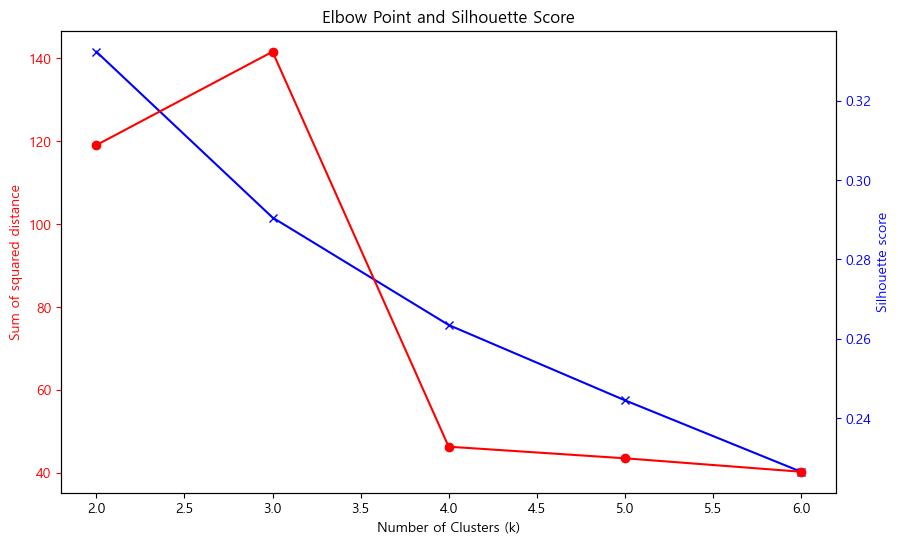

In [64]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

***

# K-means

엘보우 포인터와 실루엣을 고려해서 n_clusters를 3으로 선정

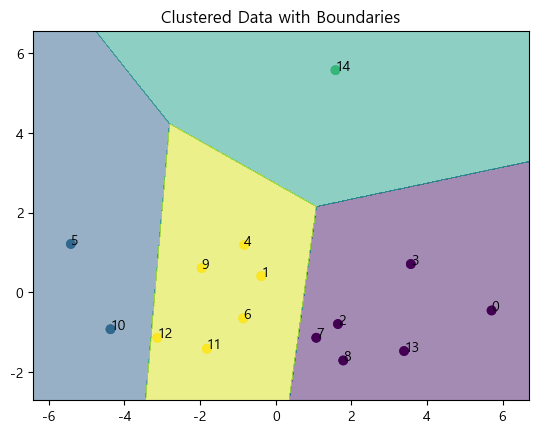

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()
# 6 1 6

***

# GMM

c:\Users\shjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


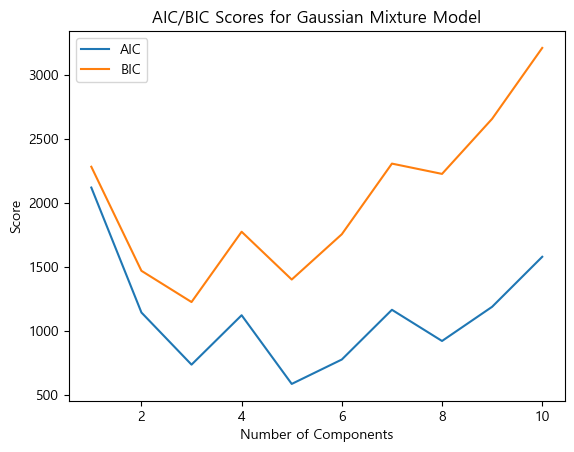

[2119.8135510840175, 1141.782833508576, 733.7181129137061, 1120.4371278688632, 582.800164116705, 773.8821911375778, 1163.0622020130177, 918.9003476369599, 1186.5536549322524, 1577.8591204233917]
[2282.6650973375254, 1468.1939762166949, 1223.6888520764355, 1773.967463486203, 1399.8900961886554, 1754.5317196641388, 2307.2713269941887, 2226.669069072742, 2657.8819728226445, 3212.7470347683948]


In [75]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 11)
aic_values = []
bic_values = []
for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, random_state=0)
    model.fit(df)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(df)
    bic = model.bic(df)
    aic_values.append(aic)
    bic_values.append(bic)

# AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()
print(aic_values)
print(bic_values)

k=3

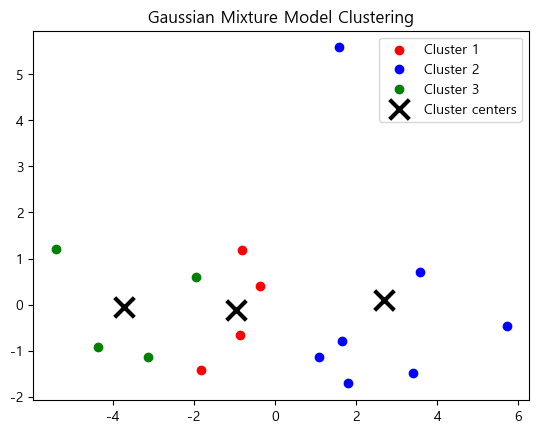

In [48]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=200, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 3 6 6

***

# PAM기법

In [32]:
%pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

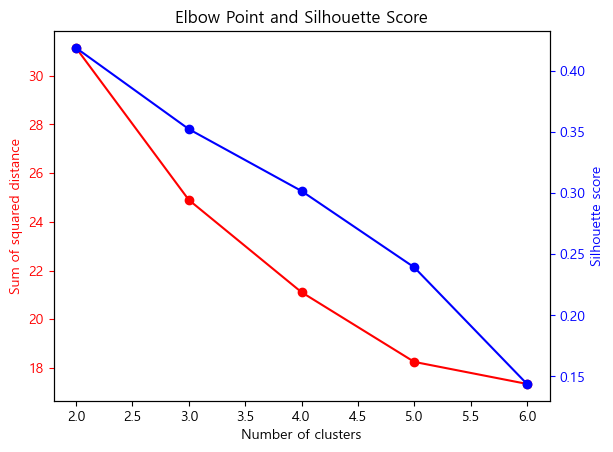

In [34]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

In [35]:
from scipy.spatial import ConvexHull

cl = 3

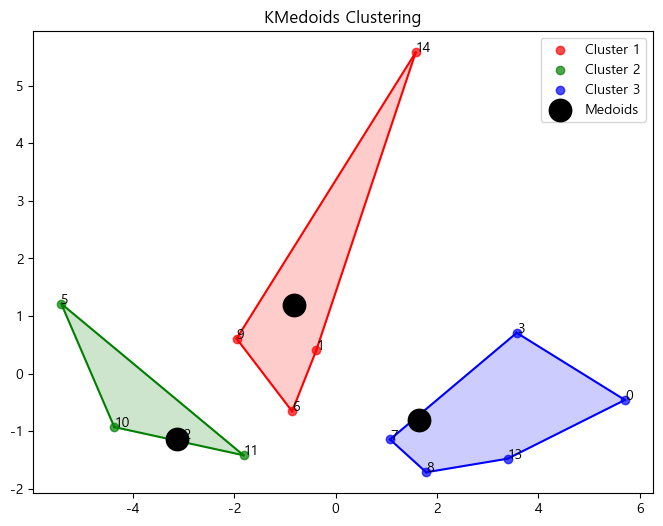

In [36]:
# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=3, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(3):
    cluster_points = X_pca[y_kmedoids == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], alpha=0.7,
               label=f'Cluster {i+1}')
    # Get indices of outermost points in the cluster
    hull = ConvexHull(cluster_points)
    outermost_points_idx = hull.vertices
    # Plot lines connecting outermost points and fill interior space
    n_points = len(outermost_points_idx)
    for j in range(n_points):
        ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
    ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)

# Plot Medoids as black markers
medoids = kmedoids.cluster_centers_
ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=200,
           linewidths=3, color='black', zorder=10, label='Medoids')


# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()
# 4 5 6

***